# Airbnb
Note
Instructions have been included for each segment. 
You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Standard library imports

# Third party imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Local application imports
##from modules import pyneers
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Code to diplay all data columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

error_message_ = 'Loading data, please wait...'
#Load Airbnb Data Frame and assign to a CONSTANT
print(error_message_)
try:
    error_message_ = 'System ready'
    AIRBNB_DT = pd.read_csv('data/listings.csv')
    print(error_message_)
except:
    print("Unexpected error found. Make sure CSV exist")

Loading data, please wait...
System ready


In [75]:
# Local application imports
##from modules import Airbnb
class Airbnb:
    def __init__(self, city):
        self.city = city
        self.df = AIRBNB_DT[AIRBNB_DT['state'] == self.city]
        self.df['price'] = self.df['price'].replace('[\$,]', '', regex=True).astype(float)
        self.df['weekly_price'] = self.df['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
        self.df['monthly_price'] = self.df['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
        
        print(f"{self.city} loaded and ready to analyze")
        
    #Internal: It can be call by other method only.
    def _line_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        line_plot_xlabel = axis_x
        line_plot_ylabel = axis_y
        
        fig, line_plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')
        
        line_plot_name.plot(line_plot_xlabel, line_plot_ylabel)
        
        line_plot_name.grid()
        line_plot_name.set_xlabel(label_x)
        line_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                line_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                line_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: It can be call by other method only.
    def _scatter_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        fig, plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')

        plot_name.scatter(axis_x, axis_y, color='g', marker='o', edgecolors='r')

        plot_name.grid()
        plot_name.set_xlabel(label_x)
        plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                plot_name.set_ylim(zoom_y)
        except:
            pass
        plot_name.legend(loc='best')
        return plt.show()
    
    #Internal: It can be call by other method only.
    def _bar_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        bar_xlabel = axis_x
        bar_ylabel = axis_y
        
        fig, bar_plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')
        
        bar_plot_name.bar(bar_xlabel, bar_ylabel, align='center', alpha=0.5)
        
        bar_plot_name.grid()
        bar_plot_name.set_xlabel(label_x)
        bar_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                bar_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                bar_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: Determine whether a zoom value is valid or not
    def _is_zoom(self, zoom_val):
        if zoom_val[0] > 0 or zoom_val[1] > 0:
            return zoom_val
        else:
            return False
    
    #Parameters:
    # *x_zoom (list): Zoom into x axis. Most have 2 values: [10,10]
    # *y_zoom (list): Zoom into y axis. Most have 2 values: [25,55]
    def supply_month(self, x_zoom, y_zoom):
        print(f"*Average Advertising per month: {self.df.id.count()}") 
        return self._scatter_plot(self.df['review_scores_rating'],
                                  self.df['monthly_price'],
                                  'Reviews vs Monthly Price',
                                  'Reviews',
                                  'Monthly Price',
                                  self._is_zoom(x_zoom),
                                  self._is_zoom(y_zoom)
                                 )
    #Calculate daily rate. Use 'price' column to do the math
    def daily_rate(self):
        #Average daily rate per month
        self.daily_rate = self.df.price.mean()
        print(f"Average daily rate: {str(self.daily_rate)}")
    
    #Calculate Availibility rate by periods.
    #Parameters:
    # *days (int): 30, 60, 90 or 365 days only. Other value will be rejected.
    def aval_rate(self, days):
        if days == 30 or days == 60 or days == 90 or days == 365:
            days_range = 'availability_' + str(days)
            return (self.df[days_range]/days*100).mean()
        else:
            return "aval_rate accepts 30, 60, 90 or 365 days"
    
    #Calculate Total Revenue rate by day, week, or month.
    #Parameters:
    # *period (str): (d)aily, (w)eekly and (m)onthly only. Other value will be rejected.
    def total_revenue(self, period):
        if period == 'd':
            price_column = 'price'
        elif period == 'w':
            price_column = 'weekly_price'
        elif period == 'm':
            price_column = 'monthly_price'
        else:
            return 'Unknown period. total_revenue accepts (d)aily, (w)eekly and (m)onthly parameters only'

        return self.df[price_column].mean()
    
    #Create DF of Room types and count each type.
    def room_type(self,):
        #Los Angeles room by category (CHECK IF THERE MANY YEARS OF DATA)
        room_type_df = self.df.groupby(["room_type"])["id"].count().reset_index()
        room_type_df.columns = ['Room Type', 'Quantity']
        return room_type_df
        #Los Angeles room category by percentage last month
        #Grafica apilada por mes
    
    def bedrooms(self, x_zoom, y_zoom):
        count_bedrooms = self.df.groupby(['bedrooms','room_type']).id.count().reset_index()
        count_bedrooms_pivot = count_bedrooms.pivot(index = 'bedrooms', columns='room_type', values='id').reset_index()
        print(count_bedrooms_pivot.fillna(0))
        return self._bar_plot(count_bedrooms['bedrooms'],
                              count_bedrooms['id'],
                              'Bedrooms per propertie',
                              'Bedrooms',
                              'Properties',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom)
                             )
    
    def review_type_room(self, x_zoom, y_zoom):
        rtr_dr = self.df.groupby('room_type').review_scores_rating.mean().reset_index()
        print(rtr_dr)
        return self._bar_plot(rtr_dr['room_type'], 
                               rtr_dr['review_scores_rating'], 
                               'Reviews per room type (%)', 'Room Type', 'Avg. Reviews', self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def neighborhood(self, x_zoom, y_zoom, type_):
        if type_ == 'p':
            type_lookup = 'price'
            type_ylabel = 'Price'
            type_title = 'Avg. price per neighborhood'
        elif type_ == 'r':
            type_lookup = 'review_scores_rating'
            type_ylabel = 'Reviews scores'
            type_title = 'Avg. reviews per neighborhood'
        else:
            return f"Type {type_} doesn't exist. (p)rice and (r)eviews score rating accepted only"
            
        neigh_dr = self.df.groupby('neighbourhood')[type_lookup].mean().reset_index().sort_values(type_lookup, ascending=False).head(5)
        print(neigh_dr)
        return self._bar_plot(neigh_dr['neighbourhood'],
                              neigh_dr[type_lookup],
                              type_title,
                              'Neighborhood', type_ylabel,
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))

# Overview Los Angeles-Airbnb market 
#### april 2018 to may 2019

In [76]:
city = Airbnb('CA')

CA loaded and ready to analyze


## Supply month

*Average Advertising per month: 43894


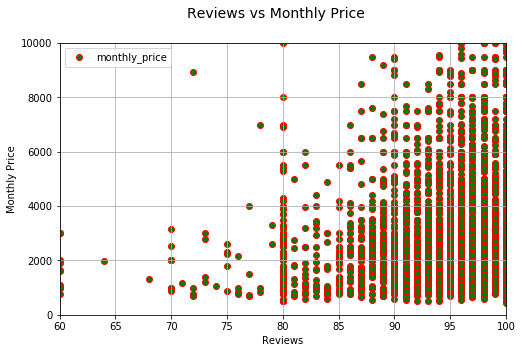

In [77]:
city.supply_month([60,100],[1,10000])

## Daily Rate per month

In [78]:
city.daily_rate()
#Gráfica por mes

Average daily rate: 199.57964642092313


## Availability per month

In [79]:
city.aval_rate(365)

43.91193978519703

In [80]:
AIRBNB_DT.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

## Total revenue

In [81]:
city.total_revenue('w')

1032.2547078237235

## Room Type list

In [50]:
city.room_type()

,Room Type,Quantity
0,Entire home/apt,27576
1,Private room,14539
2,Shared room,1779


## Bedrooms per propertie

room_type  bedrooms  Entire home/apt  Private room  Shared room
0               0.0           4256.0         489.0          1.0
1               1.0          10499.0       13363.0       1778.0
2               2.0           7257.0         538.0          0.0
3               3.0           3249.0          98.0          0.0
4               4.0           1380.0          31.0          0.0
5               5.0            598.0          11.0          0.0
6               6.0            182.0           1.0          0.0
7               7.0             92.0           1.0          0.0
8               8.0             20.0           1.0          0.0
9               9.0             13.0           1.0          0.0
10             10.0              7.0           0.0          0.0
11             11.0              4.0           1.0          0.0
12             12.0              0.0           1.0          0.0


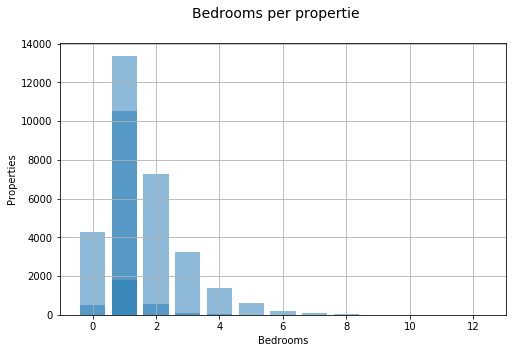

In [51]:
city.bedrooms([0,0],[0,0])

## Bedrooms per room type

         room_type  review_scores_rating
0  Entire home/apt             94.645280
1     Private room             94.628839
2      Shared room             90.082372


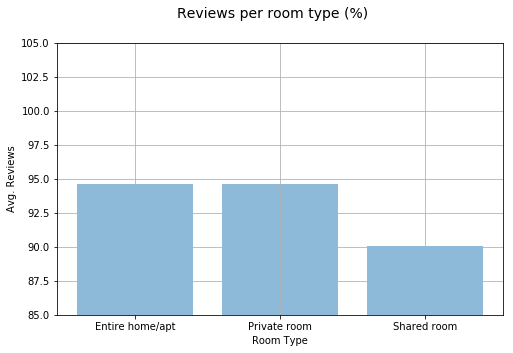

In [71]:
city.review_type_room([0,0],[85,105])

## Average Price per neighborhood (Top 5)

             neighbourhood        price
109          Rolling Hills  1883.750000
77                  Malibu  1447.008310
11   Bel Air/Beverly Crest  1132.241441
69           Laurel Canyon   725.027473
17                Bradbury   699.500000


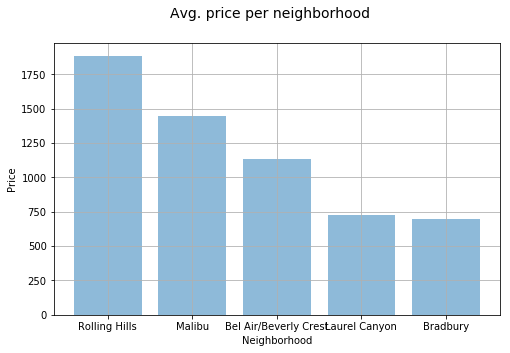

In [69]:
#Los Angeles average price per neighborhood (to get the top 5 best neighborhoods)
city.neighborhood([0,0],[0,0],'p')
#Graph (bars)

            neighbourhood  review_scores_rating
13           Bell Gardens            100.000000
61              Irwindale             99.750000
4                  Arleta             98.555556
63  La Crescenta-Montrose             98.384615
59        Huntington Park             98.166667


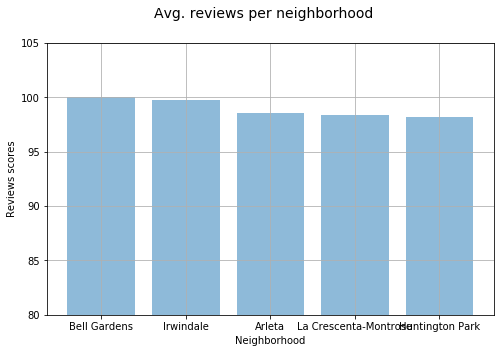

In [56]:
#Los Angeles average reviews per neighborhood (to get the top 5 best neighborhoods)
city.neighborhood([0,0],[80,105],'r')
#Graph (bars)

In [13]:
#Hipotesis nula: malos reviews con buenos reviews son las mismas
#Hipotesis alternativa: los reviews afectan al precio
#Calcular promedios de los precios con malos y buenos reviews( por debajo y encima del promedio)
#calcular promedios de los precios con buenos y malos reviews (q1 y q3)


In [14]:
#API del banco mundial para obtener salario o pib per capita y compararlo con el ingreso de airbnb mensual
#graficar